In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [3]:
def list_directory_tree_with_os_walk(starting_directory):
    for root, directories, files in os.walk(starting_directory):
        print(f"Directory: {root}")
        for file in files:
            print(f"  File: {file}")

list_directory_tree_with_os_walk('.')

Directory: .
  File: my_first_submission.csv
  File: .DS_Store
  File: test.csv
  File: data_analytics.ipynb
  File: .gitignore
  File: output.png
  File: Readme1.md
  File: predictions.ipynb
  File: sample_submission.csv
  File: read_files.ipynb
Directory: ./A
  File: X_train_observed.parquet
  File: train_targets.parquet
  File: X_train_estimated.parquet
  File: X_test_estimated.parquet
Directory: ./.git
  File: ORIG_HEAD
  File: config
  File: HEAD
  File: description
  File: index
  File: COMMIT_EDITMSG
  File: FETCH_HEAD
Directory: ./.git/objects
Directory: ./.git/objects/50
  File: be1c9b98460d33038ec63cdd7cc37ddbed78e8
Directory: ./.git/objects/9b
  File: da359a00da91ad5d9bca006d284da28f2f09e3
Directory: ./.git/objects/9e
  File: 18ff6b96f08ab6b477b26aa59535aacddea30c
Directory: ./.git/objects/69
  File: 3fed9e3038e83d785513466c9c8e310b6b949c
Directory: ./.git/objects/67
  File: 6dcd338b1695f50a39a3cc5d9412d1688cdc7a
Directory: ./.git/objects/60
  File: b9e35b3b66139df923b4f9586

<AxesSubplot: title={'center': 'train C'}, xlabel='time'>

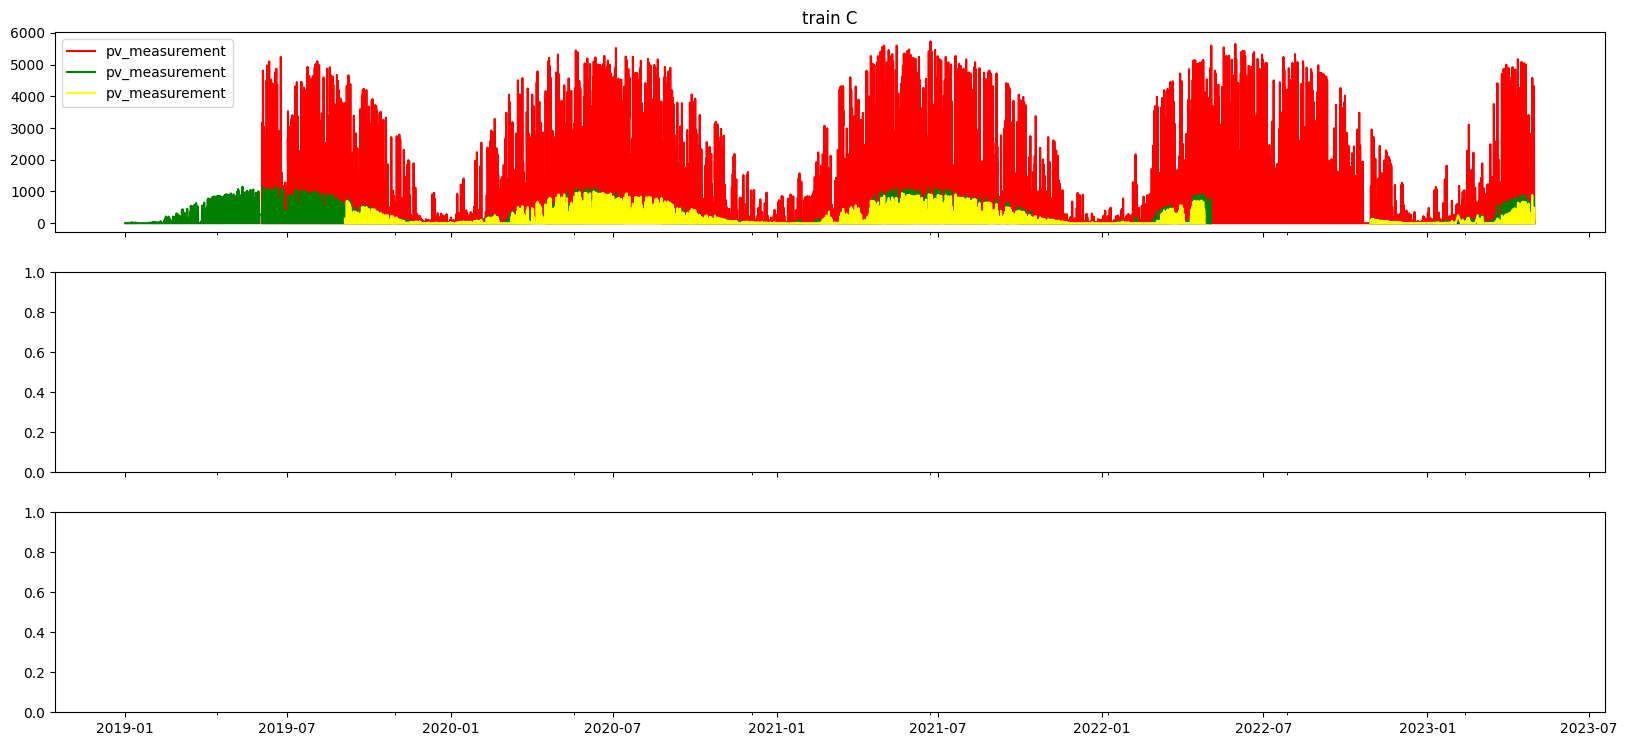

In [4]:
train_a = pd.read_parquet('A/train_targets.parquet')
train_b = pd.read_parquet('B/train_targets.parquet')
train_c = pd.read_parquet('C/train_targets.parquet')

train_a
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)

train_a[['time', "pv_measurement"]].set_index('time').plot(ax=axs[0], title='train A', color='red')
train_b[['time', "pv_measurement"]].set_index('time').plot(ax=axs[0], title='train B', color='green')
train_c[['time', "pv_measurement"]].set_index('time').plot(ax=axs[0], title='train C', color='yellow')


In [5]:

X_train_estimated_a = pd.read_parquet('A/X_train_estimated.parquet')
X_train_estimated_b = pd.read_parquet('B/X_train_estimated.parquet')
X_train_estimated_c = pd.read_parquet('C/X_train_estimated.parquet')


In [6]:
X_train_observed_a = pd.read_parquet('A/X_train_observed.parquet')
X_train_observed_b = pd.read_parquet('B/X_train_observed.parquet')
X_train_observed_c = pd.read_parquet('C/X_train_observed.parquet')


In [7]:
X_test_estimated_a = pd.read_parquet('A/X_test_estimated.parquet')
X_test_estimated_b = pd.read_parquet('B/X_test_estimated.parquet')
X_test_estimated_c = pd.read_parquet('C/X_test_estimated.parquet')


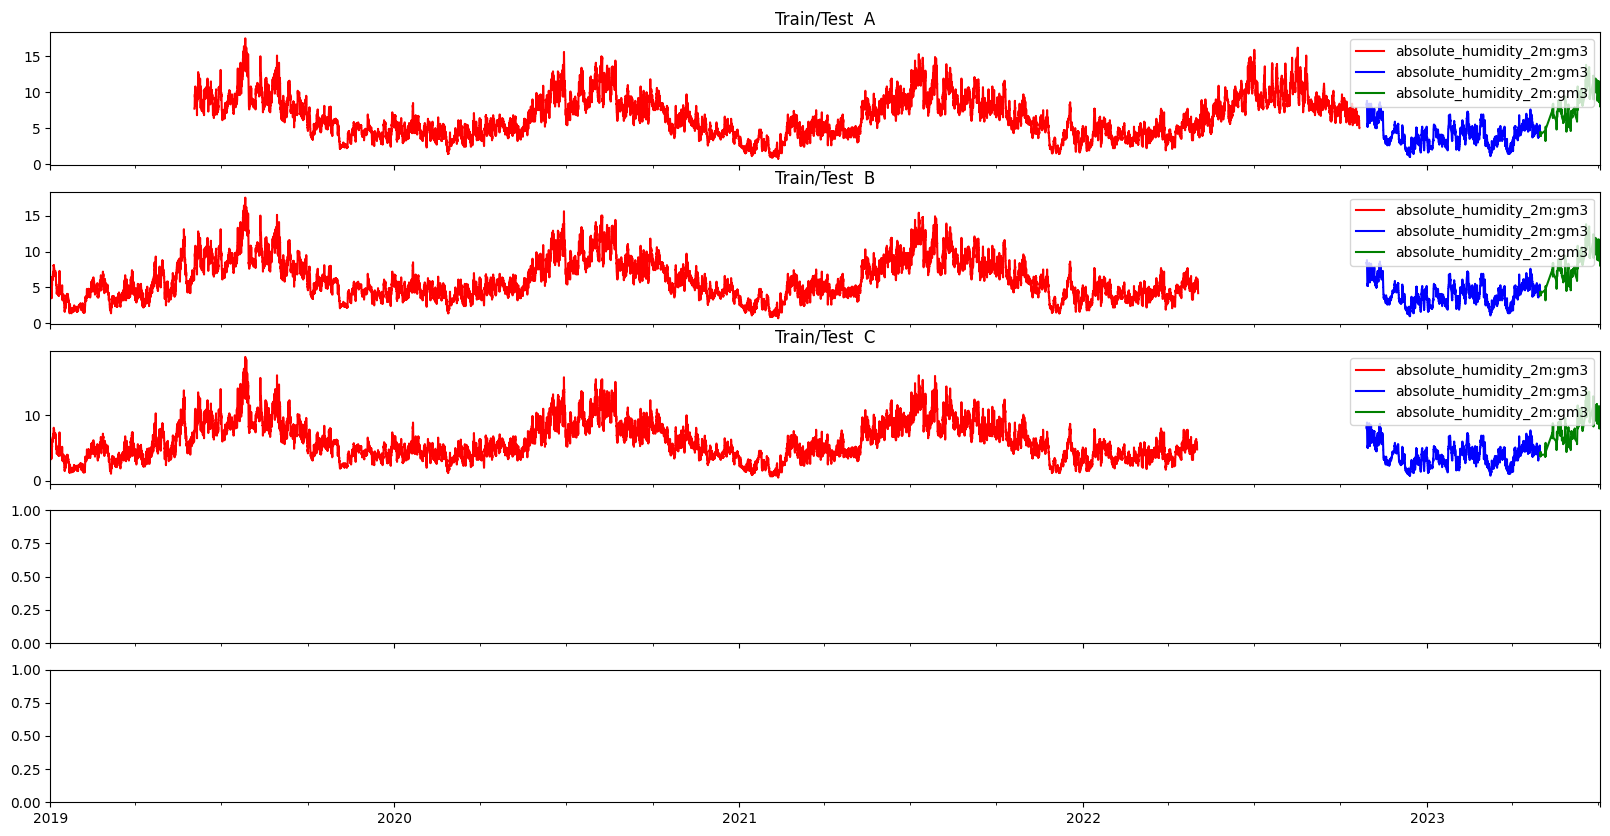

In [15]:
# Plotting a single feature
fig, axs = plt.subplots(3, 1, figsize=(20, 10), sharex=True)
feature_name = 'absolute_humidity_2m:gm3'

X_train_observed_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='red')
X_train_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test A', color='blue')
X_test_estimated_a[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[0], title='Train/Test  A', color='green')

X_train_observed_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='red')
X_train_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='blue')
X_test_estimated_b[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[1], title='Train/Test  B', color='green')

X_train_observed_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='red')
X_train_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='blue')
X_test_estimated_c[['date_forecast', feature_name]].set_index('date_forecast').plot(ax=axs[2], title='Train/Test  C', color='green')


plt.show()

In [18]:
sample_submission = pd.read_csv('sample_submission.csv')

print(X_test_estimated_a.shape)
print(X_test_estimated_b.shape)
print(X_test_estimated_c.head)

sample_submission



(2880, 47)
(2880, 47)
<bound method NDFrame.head of                date_calc       date_forecast  absolute_humidity_2m:gm3  \
0    2023-04-30 07:00:04 2023-05-01 00:00:00                       4.2   
1    2023-04-30 07:00:04 2023-05-01 00:15:00                       4.2   
2    2023-04-30 07:00:04 2023-05-01 00:30:00                       4.1   
3    2023-04-30 07:00:04 2023-05-01 00:45:00                       4.1   
4    2023-04-30 07:00:04 2023-05-01 01:00:00                       4.1   
...                  ...                 ...                       ...   
2875 2023-07-02 07:00:31 2023-07-03 22:45:00                       9.0   
2876 2023-07-02 07:00:31 2023-07-03 23:00:00                       9.0   
2877 2023-07-02 07:00:31 2023-07-03 23:15:00                       9.0   
2878 2023-07-02 07:00:31 2023-07-03 23:30:00                       8.9   
2879 2023-07-02 07:00:31 2023-07-03 23:45:00                       8.9   

      air_density_2m:kgm3  ceiling_height_agl:m  clear_sky_

,id,prediction
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0
...,...,...
2155,2155,0
2156,2156,0
2157,2157,0
2158,2158,0


In [22]:
# Example, let the predictions be random values
test = np.random.rand(2160)
sample_submission = sample_submission[['id']].merge(test[['id', 'prediction']], on='id', how='left')
sample_submission.to_csv('my_first_submission.csv', index=False)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

Making some prediction 

In [ ]:
from sklearn.linear_model import LogisticRegression

X = X_train_observed_a_fix[0:20000]
X_test = X_train_observed_a_fix[20001:]

print(X_test.shape)

y = np.where(train_a_fix["pv_measurement"] >= np.median(train_a_fix["pv_measurement"]), 1, 0)

y_ = y[0:20000]
y_test = y[20001:]

print(y_test.shape)

clf = LogisticRegression(random_state=0).fit(X, y_)

score = clf.score(X_test, y_test)

print(score)



(9666, 42)
(9666,)
0.9623422304986551


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
X_train_estimated_b.tail()

,date_calc,date_forecast,absolute_humidity_2m:gm3,air_density_2m:kgm3,ceiling_height_agl:m,clear_sky_energy_1h:J,clear_sky_rad:W,cloud_base_agl:m,dew_or_rime:idx,dew_point_2m:K,diffuse_rad:W,diffuse_rad_1h:J,direct_rad:W,direct_rad_1h:J,effective_cloud_cover:p,elevation:m,fresh_snow_12h:cm,fresh_snow_1h:cm,fresh_snow_24h:cm,fresh_snow_3h:cm,fresh_snow_6h:cm,is_day:idx,is_in_shadow:idx,msl_pressure:hPa,precip_5min:mm,precip_type_5min:idx,pressure_100m:hPa,pressure_50m:hPa,prob_rime:p,rain_water:kgm2,relative_humidity_1000hPa:p,sfc_pressure:hPa,snow_density:kgm3,snow_depth:cm,snow_drift:idx,snow_melt_10min:mm,snow_water:kgm2,sun_azimuth:d,sun_elevation:d,super_cooled_liquid_water:kgm2,t_1000hPa:K,total_cloud_cover:p,visibility:m,wind_speed_10m:ms,wind_speed_u_10m:ms,wind_speed_v_10m:ms,wind_speed_w_1000hPa:ms
17571,2023-04-29 07:00:05,2023-04-30 22:45:00,4.5,1.280,1175.400024,0.0,0.0,536.299988,0.0,272.200012,0.0,0.0,0.0,0.0,99.599998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.400024,0.0,0.0,1001.000000,1007.299988,0.0,0.0,79.599998,1013.599976,NaN,0.0,0.0,-0.0,0.1,352.92099,-11.731,0.1,274.200012,99.900002,11721.799805,3.9,3.0,2.5,-0.0
17572,2023-04-29 07:00:05,2023-04-30 23:00:00,4.5,1.281,1055.800049,0.0,0.0,542.099976,0.0,272.200012,0.0,0.0,0.0,0.0,100.000000,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.299988,0.0,0.0,1001.000000,1007.200012,0.0,0.0,80.000000,1013.500000,NaN,0.0,0.0,-0.0,0.1,356.63501,-11.884,0.1,274.200012,100.000000,9955.500000,3.7,2.8,2.5,-0.0
17573,2023-04-29 07:00:05,2023-04-30 23:15:00,4.5,1.280,1437.300049,0.0,0.0,531.500000,0.0,272.200012,0.0,0.0,0.0,0.0,99.400002,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.200012,0.0,0.0,1000.799988,1007.099976,0.0,0.0,79.900002,1013.299988,NaN,0.0,0.0,-0.0,0.1,0.35300,-11.928,0.1,274.200012,99.900002,11324.400391,3.7,2.8,2.5,-0.0
17574,2023-04-29 07:00:05,2023-04-30 23:30:00,4.5,1.280,1818.699951,0.0,0.0,520.900024,0.0,272.299988,0.0,0.0,0.0,0.0,98.099998,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1014.000000,0.0,0.0,1000.700012,1006.900024,0.0,0.0,79.800003,1013.200012,NaN,0.0,0.0,-0.0,0.0,4.07000,-11.863,0.1,274.299988,99.599998,12693.599609,3.8,2.7,2.6,-0.0
17575,2023-04-29 07:00:05,2023-04-30 23:45:00,4.5,1.280,2200.100098,0.0,0.0,510.299988,0.0,272.299988,0.0,0.0,0.0,0.0,96.199997,7.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1013.900024,0.0,0.0,1000.500000,1006.799988,0.0,0.0,79.699997,1013.099976,NaN,0.0,0.0,-0.0,0.0,7.78200,-11.690,0.0,274.299988,99.300003,14062.900391,3.8,2.7,2.7,-0.0
